In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools

In [30]:
data = pd.read_csv("bank-additional-full.csv", index_col=None)

In [31]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [33]:
#check for null values
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [34]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [53]:
target = data['y'].copy()
x = data.drop(['y'], axis=1)

In [56]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [57]:
categorical_cols = x.select_dtypes(['object']).columns

In [58]:
x[categorical_cols].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [60]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [59]:
#unique variables in data
x.apply(lambda x: len(x.unique()))

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
dtype: int64

In [61]:
#convert categorical data to numerical columns using one hot encoding
x_new = pd.get_dummies(x, columns=categorical_cols)

In [62]:
x_new.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [63]:
x_new.shape

(41188, 63)

In [68]:
x_new.select_dtypes(['object']).columns
#all the data is now numerical

Index([], dtype='object')

In [70]:
target.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [71]:
y = target.map({"yes":1, "no":0})

In [74]:
#train test split
x_train, x_cv, y_train, y_cv= train_test_split(x_new, y, test_size = 0.2, stratify = y)

In [75]:
for df in[x_train, x_cv, y_train, y_cv]:
    print(df.shape)

(32950, 63)
(8238, 63)
(32950,)
(8238,)


In [79]:
clf = ExtraTreesClassifier(n_estimators=100)

In [82]:
cv = StratifiedKFold(n_splits=10, shuffle=False)
score_2 = cross_val_score(clf, x_train, y_train, cv=cv, n_jobs=-1)
print('Average accuracy: {} %'.format(np.mean(score_2)*100))

Average accuracy: 90.1032046959088 %


In [91]:
clf.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "%.0f"%(cm[i, j])
        print(t)
        plt.text(j, i, t,
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy is 90.07 percent
Confusion matrix, without normalization
7087
223
595
333


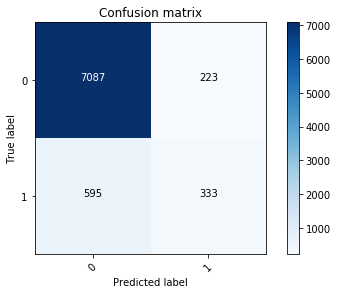

In [104]:
y_pred = clf.predict(x_cv)
print("Accuracy is %.2f percent"%(accuracy_score(y_cv, y_pred)*100))

cnf_matrix = confusion_matrix(y_cv, y_pred)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y_cv))), normalize = False, title='Confusion matrix')

Since the data set is highly imbalanced even though the accuracy seems to be higer, its just because of modal class

In [108]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [109]:
print(indices)

[ 1  8  0  2  9  3 62  7  5 39 37 10 23 32 29 56  6 57 58 24 59 55 19 42
 40  4 31 51 11 22 28 61 50 60 14 17 53 15 26 43 44 33 34 35 27 16 18 12
 20 45 49 13 48 52 46 54 41 38 21 47 25 30 36]


In [110]:
n_features = len(indices)

1. duration (0.212285)
2. euribor3m (0.079515)
3. age (0.073795)
4. campaign (0.054448)
5. nr.employed (0.037446)
6. pdays (0.034731)
7. poutcome_success (0.028351)
8. cons.conf.idx (0.021294)
9. emp.var.rate (0.020195)
10. housing_yes (0.017262)
11. housing_no (0.017094)
12. job_admin. (0.015082)
13. marital_married (0.014611)
14. education_university.degree (0.013959)
15. education_high.school (0.013931)
16. day_of_week_mon (0.013903)
17. cons.price.idx (0.013899)
18. day_of_week_thu (0.013291)
19. day_of_week_tue (0.013283)
20. marital_single (0.013279)
21. day_of_week_wed (0.012659)
22. day_of_week_fri (0.012545)
23. job_technician (0.012338)
24. loan_yes (0.011698)
25. loan_no (0.011665)
26. previous (0.010831)
27. education_professional.course (0.010064)
28. month_may (0.010059)
29. job_blue-collar (0.009933)
30. marital_divorced (0.009487)
31. education_basic.9y (0.009426)
32. poutcome_nonexistent (0.009207)
33. month_mar (0.008898)
34. poutcome_failure (0.008707)
35. job_manage

(0, 0.2330879711968085)

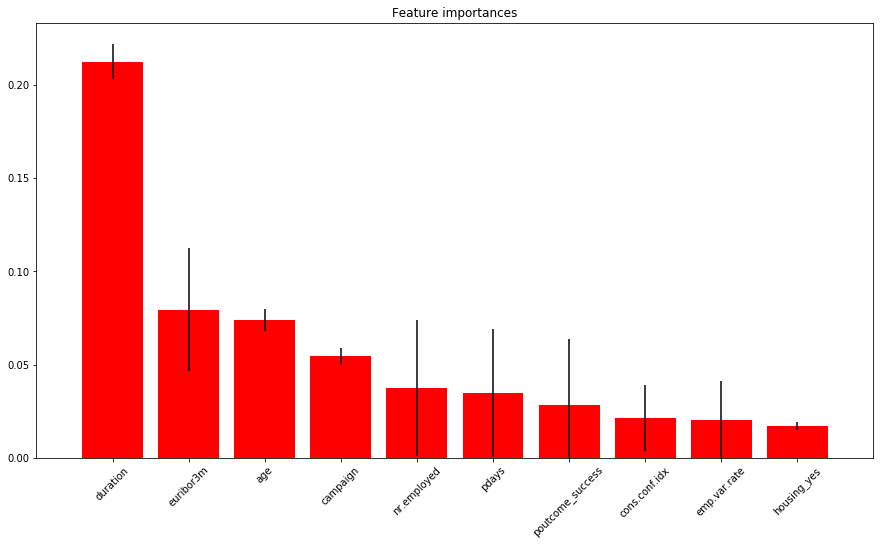

In [114]:
for f in range(n_features):
    print("%d. %s (%f)" % (f + 1, x_new.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")  # just the top 10 features
num_feat_to_plot = 10
plt.bar(range(num_feat_to_plot), importances[indices[:num_feat_to_plot]],
       color="r", yerr=std[indices[:num_feat_to_plot]], align="center")
plt.xticks(range(num_feat_to_plot), np.array(x_new.columns)[indices[:num_feat_to_plot]])
plt.xlim([-1, num_feat_to_plot])
plt.xticks(rotation=45)
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])